# **Problema de las 8 reinas**

El problema de las ocho reinas es un pasatiempo que consiste en poner ocho reinas en el tablero de ajedrez sin que se amenacen. Fue propuesto por el ajedrecista alemán Max Bezzel en 1848. En el juego del ajedrez la reina amenaza a aquellas piezas que se encuentren en su misma fila, columna o diagonal.

A continuación se encuentra la implementación del problema de las 8 reinas usando Algoritmos Genéticos.

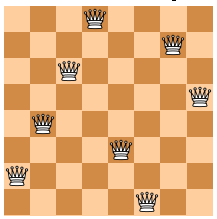

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [37]:
def poblacion_inicial(tamano_de_poblacion):
    # Debe retornar una matriz de (tamaño de poblacion, 8)
    # Cada fila de la matriz representa un individuo con su gen de 8 elementos

    #Crea matriz tamaño (tamano_de_poblacion x 8) con números aleatorios del 1 al 8
    matriz = np.random.randint(1, 9, size=(tamano_de_poblacion, 8))
    return matriz
    pass

In [38]:
def funcion_idoneidad(poblacion):
    # Debe retornar un vector de tamaño (tamaño poblacion) en el que cada elemento del vector
    # es el valor de idoneidad cada individuo

    idoneidad = []
    for individuo in poblacion: #For para ir de lista en lista (modelo en modelo)
      ataques = 0
      for i in range(8):  #For para contar intercepciones
        for j in range(i + 1, 8):
          if individuo[i] == individuo[j] or abs(individuo[i] - individuo[j]) == j - i:
            ataques += 1
      idoneidad.append(28 - ataques)
    return np.array(idoneidad)

In [39]:
def seleccion(poblacion,fun_idoneidad):
    # Retorne los 2 padres que resultan de la seleccion de tipo ruleta

    # Normaliza las puntuaciones de idoneidad para convertirlas en una distribución de probabilidades
    #probabilidad_normalizada = [score / sum(fun_idoneidad) for score in fun_idoneidad]
    probabilidad_normalizada = fun_idoneidad / np.sum(fun_idoneidad)
    probabilidad_seleccion = fun_idoneidad / np.sum(fun_idoneidad)

    # Selecciona un índice(modelo) aleatoriamente ponderados por la idoneidad para cada padre
    padre1 = poblacion[np.random.choice(len(poblacion), p=probabilidad_seleccion)]
    padre2 = poblacion[np.random.choice(len(poblacion), p=probabilidad_seleccion)]

    return padre1, padre2
    pass

In [40]:
def cross_over(padre1,padre2):
    # Retorna los dos hijos producto del cross-over entre padre1 y padre2

    # Verifica si los padres tienen la misma longitud
    if len(padre1) != len(padre2):
      raise ValueError("Los padres deben tener la misma longitud")

    # Genera un número aleatorio entre 1 y len(padre1) - 1 para determinar la posición de intercambio
    posicion_intercambio = random.randint(1, len(padre1) - 1)

    # Realiza el intercambio de elementos a partir de la posición de intercambio
    hijo1 = np.concatenate((padre1[:posicion_intercambio], padre2[posicion_intercambio:]))
    hijo2 = np.concatenate((padre2[:posicion_intercambio], padre1[posicion_intercambio:]))

    return hijo1, hijo2, posicion_intercambio
    pass

In [41]:
def mutacion(hijo1,hijo2):
    # Retorna los dos hijos mutados

    probabilidad_mutacion = 0.02  #Probabilidad baja para mutación de 2%
    for i in range(8):
      #Para cada gen en cada hijo, generamos un número aleatorio entre 0 y 1
      if random.random() < probabilidad_mutacion:
        #Si el número aleatorio es menor que la probabilidad de mutación, realizamos la mutación
        hijo1[i] = random.randint(1, 8)
        hijo2[i] = random.randint(1, 8)

    return hijo1, hijo2
    pass

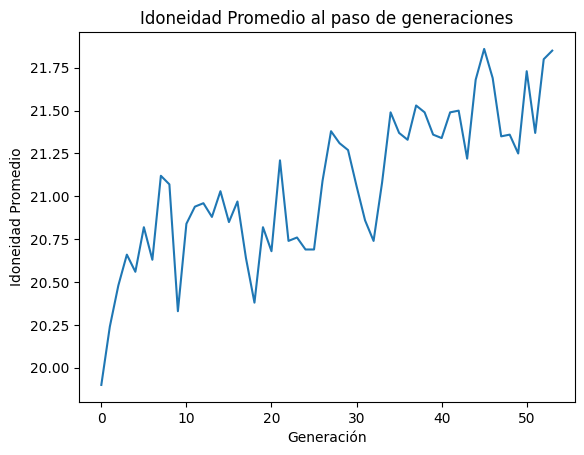

Mejor solución encontrada: [2 6 1 7 4 8 3 5]
Idoneidad de la mejor solución: 28


In [43]:
# Loop principal que repite el proceso a través de un número determinado de generaciones
'''Graficar a medida de paso de generaciones como se comporta la funcion de idoneidad promedio de la poblacion,
  además colocar secuencia de control'''

#Condiciones iniciales
tamano_poblacion = 100
num_generaciones = 1000

poblacion = poblacion_inicial(tamano_poblacion)
mejor_individuo = 0
mejor_idoneidad = float('-inf')
historial_idoneidades = []

#Ciclo while hasta que encuentre una solución sin irtercepciones
while mejor_idoneidad < 28:
  idoneidades = funcion_idoneidad(poblacion)
  promedio_idoneidades = np.mean(idoneidades)
  historial_idoneidades.append(promedio_idoneidades)  #Se agrega promedio de idoneidades

  if np.max(idoneidades) > mejor_idoneidad:
    mejor_idoneidad = np.max(idoneidades) #Selecciona mejor idoneidad que la anterior seleccionada
    mejor_individuo = poblacion[np.argmax(idoneidades)] #Selecciona mejor modelo que el anterior seleccionado

  nueva_poblacion = []
  for _ in range(tamano_poblacion // 2):
    padre1, padre2 = seleccion(poblacion, idoneidades)
    hijo1, hijo2, _ = cross_over(padre1, padre2)
    hijo1mut, hijo2mut = mutacion(hijo1, hijo2)
    nueva_poblacion.extend([hijo1mut, hijo2mut])

  poblacion = np.array(nueva_poblacion)

  '''if len(historial_idoneidades) >= num_generaciones:
    print("No se encontró una solución óptima en las generaciones máximas.")  ##ACTIVAR ESTA PARTE, QUITAR COMILLAS##
    break'''

#Gráfica a medida de paso de generaciones como se comporta la funcion de idoneidad promedio
plt.plot(list(range(len(historial_idoneidades))), historial_idoneidades)
plt.xlabel('Generación')
plt.ylabel('Idoneidad Promedio')
plt.title('Idoneidad Promedio al paso de generaciones')
plt.show()

print("Mejor solución encontrada:", mejor_individuo)
print("Idoneidad de la mejor solución:", mejor_idoneidad)

#####**NOTA:** El bloque de código anterior más exactamente el while se ejecutará hasta que encuentre una solución al problema de las 8 reinas, o sea hasta que ninguna reina se intercepte y su idoneidad sea 28. Se puede también hacer un pequeño cambio y funcione con un número determinado de generaciones que se le asigna al inicio o si encuentra una solución con idoneidad de 28, lo que suceda primero. Para hacer que el código funcione como lo último descrito solo toca quitar las comillas de la parte del código donde dice *ACTIVAR ESTA PARTE, QUITAR COMILLAS* y encontrara la mejor solución ya sea por el número de generaciones o sea la que mejor se haya comportado hasta acabar las generaciones o encuentre una solución definitiva.